In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

(24, 24, 3)


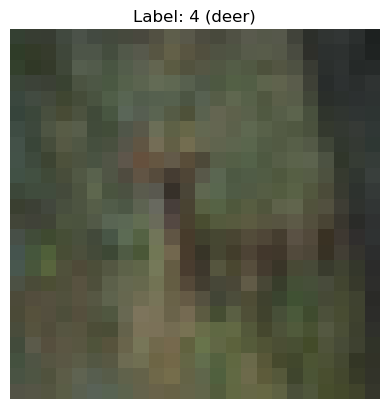

(24, 24, 3)


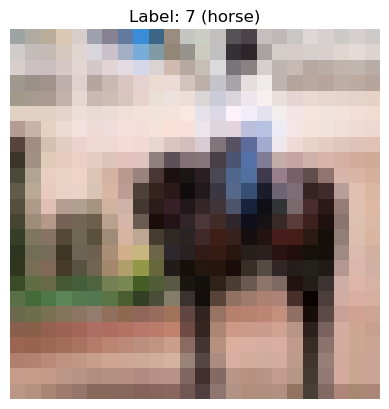

(24, 24, 3)


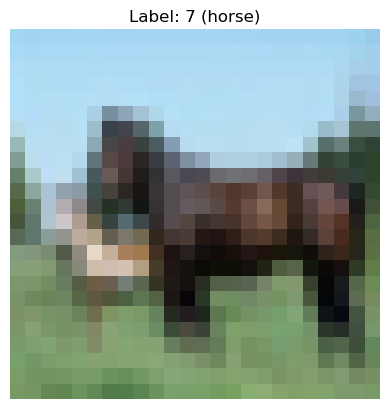

(24, 24, 3)


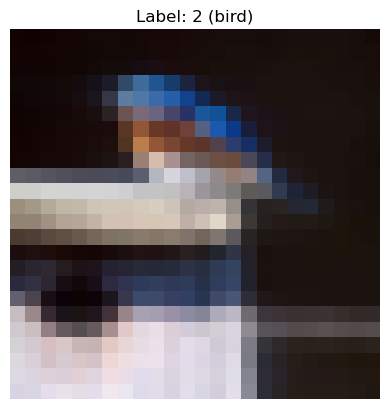

(24, 24, 3)


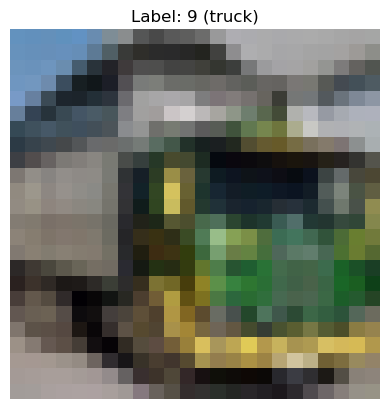

(24, 24, 3)


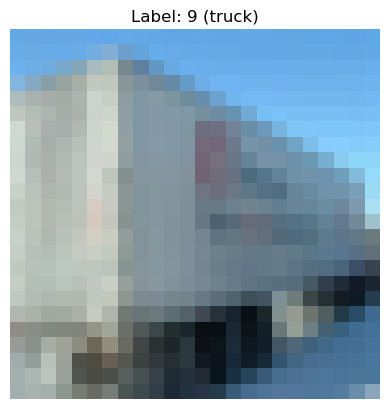

(24, 24, 3)


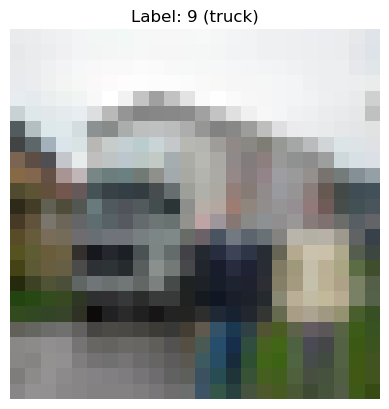

(24, 24, 3)


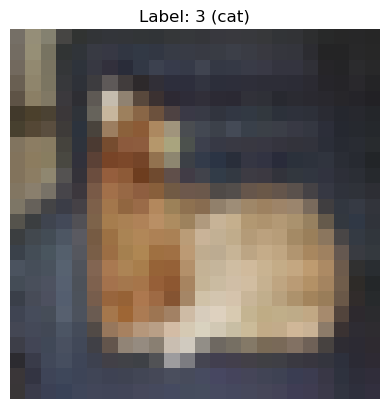

(24, 24, 3)


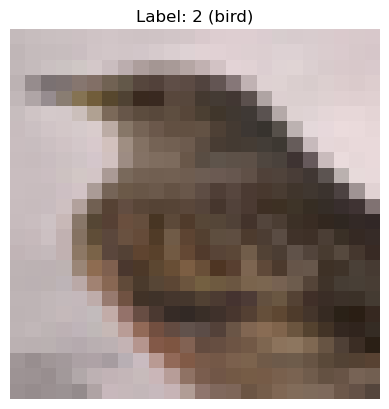

(24, 24, 3)


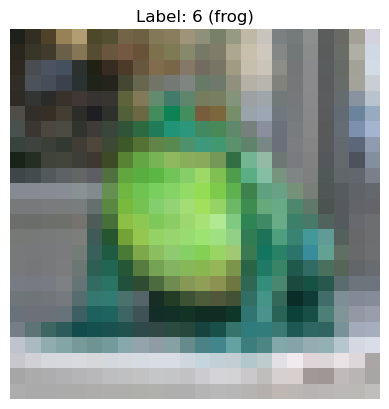

In [22]:
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as file:
        # Each image is 3073 bytes (1 label + 3072 pixel values)
        data = np.frombuffer(file.read(), dtype=np.uint8)
        
    # Reshape to 10000 rows of 3073 bytes
    data = data.reshape(-1, 3073)
    
    # First column is labels, rest are pixel values
    labels = data[:, 0]
    images = data[:, 1:]
    
    # Reshape image data: 3072 pixels -> 3 channels (32x32)
    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Shape (10000, 32, 32, 3)
    
    resized_images = np.array([np.array(Image.fromarray(image).resize((24, 24))) for image in images])
    
    return resized_images, labels

def load_class_names(file_path):
    with open(file_path, 'r') as file:
        class_names = [line.strip() for line in file]
    return class_names


def plot_sample_image(images, labels, class_names, index=0):
    # Select image and label at the given index
    image = images[index]
    label = labels[index]
    class_name = class_names[label]

    print(image.shape)
    
    # Plot the image
    plt.imshow(image)
    plt.title(f"Label: {label} ({class_name})")
    plt.axis('off')
    plt.show()

# Usage:
images, labels = load_cifar10_batch('../../Downloads/cifar10_data/cifar-10-batches-bin/data_batch_1.bin')
class_names = load_class_names('../../Downloads/cifar10_data/cifar-10-batches-bin/batches.meta.txt')


# Plot a sample image
for i in range(10, 20):
    plot_sample_image(images, labels, class_names, index=i)